In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

In [45]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [46]:
X.shape

(150, 4)

In [47]:
num_training = X.shape[0]
num_features = X.shape[1]

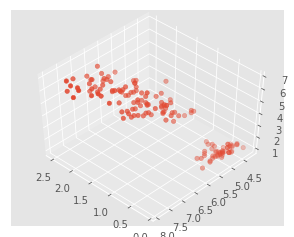

In [48]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2]);

In [49]:
class Knn:
    def __init__(self, k):
        self.k = k
        
    def distance(self, X):
        return np.sqrt(np.sum((self.X_train-X[:,np.newaxis])**2,axis=2))

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self,X):
        distances = self.distance(X)
        num_test = X.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            dist = distances[i,:]
            sorted_row = np.argsort(dist)
            closest_y = self.y_train[sorted_row[0:self.k]]
            y_pred[i] = np.argmax(np.bincount(closest_y))
        return y_pred

In [50]:
mask = np.random.choice(num_training, num_training)
X_train, X_test = X[mask][33:],X[mask][:33]
y_train, y_test = y[mask][33:],y[mask][:33]

In [51]:
def accuracy_score(y_true, y_pred):
    """ Compare y_true to y_pred and return the accuracy """
    accuracy = np.sum(y_true == y_pred, axis=0) / len(y_true)
    return accuracy

In [52]:
k = 3
model = Knn(k=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Knn Accuracy:", accuracy)

Knn Accuracy: 0.9393939393939394


In [53]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Sklearn Accuracy:", accuracy)

Sklearn Accuracy: 0.9393939393939394
